In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

## Importing the csv dataset 
it is not utf-8 encoded so , encoding needed

In [2]:
first=pd.read_csv('zomato.csv',encoding= 'latin-1')
first.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [26]:
# Basic Info 
first.shape
first.info() # Important
first.describe() # statiscal Info
first.dtypes # if we want datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

## BASIC STRUCTURE I FOLLOW
1.Missing values \
2.Explore numerical values \
3.Explore Categorical values \
4.Take Observatons

In [40]:
# 1.Explore
colums=first.columns
# Find Total no. of columns
len(colums)
# Missing values
first.isnull().sum()
# Try to find which column has  null values
missing_col=[f for f in colums if first[f].isnull().sum() >1]
missing_col

['Cuisines']

Try to visualize Missing values in Heat Map

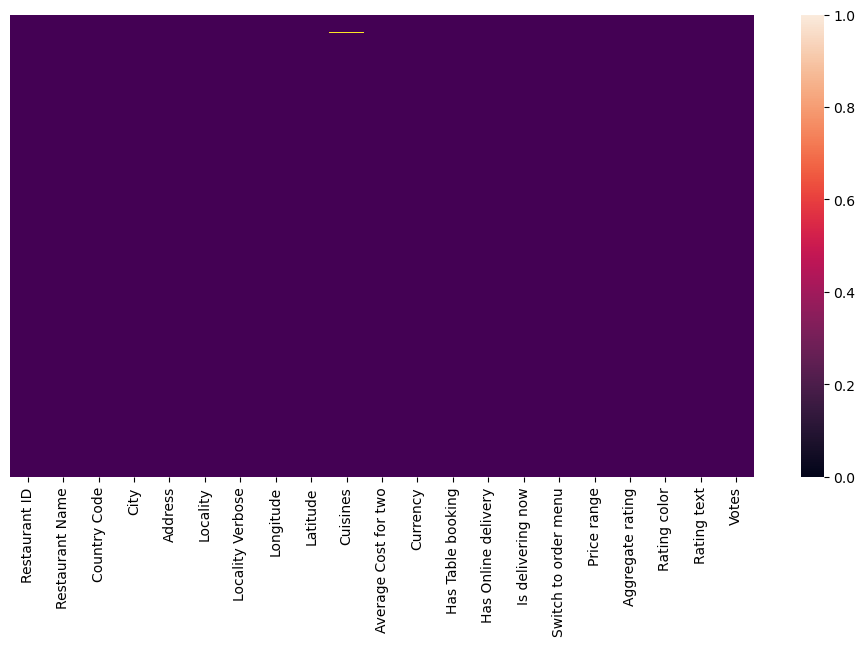

In [45]:
sns.heatmap(first.isna(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

## Observation 
i can see the missing values in cuisines\
so let us see more things\
Another xlsx file is there so try to import and and find if two are related


In [3]:
# Import country file
country=pd.read_excel('Country-Code.xlsx')
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


1.Try to find how to merge this two file -- join--\
2.first has country code so as country file\
3. use merge



In [4]:
final=pd.merge(left=first,
    right=country,
    how='left',
    on = 'Country Code' )

In [10]:
final.head(1)
# Our final Records are done
# So DO next 
# Explore

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [53]:
rating_info=final.groupby(['Rating text','Rating color','Aggregate rating']).size().reset_index().rename(columns={0:"Rating count"})
# rating_info[['Rating text'],''].groupby(['Rating text']).sum()
rating_info

,Rating text,Rating color,Aggregate rating,Rating count
0,Average,Orange,2.5,110
1,Average,Orange,2.6,191
2,Average,Orange,2.7,250
3,Average,Orange,2.8,315
4,Average,Orange,2.9,381
5,Average,Orange,3.0,468
6,Average,Orange,3.1,519
7,Average,Orange,3.2,522
8,Average,Orange,3.3,483
9,Average,Orange,3.4,498


Now make an relationship and find how many in each categories using groupby

In [54]:
each_rating_count=rating_info.groupby("Rating text")["Rating count"].sum().reset_index()
tot=rating_info['Rating count'].sum()
tot

np.int64(9551)

##### As you can see it is that the ratings are categorical (average,good,,very good,Excellent,not rated)\
##### and so like the ratings are (2.5-3.4 , 3.5-3.9 , 4.0-4.4 , 4.5-4.9 , 0.0)
Not rated are 2148 records\
Total is 9551



Top Three countries this used in is India -8652, US-434 , UK-80

In [7]:
usage=final.groupby(['Country']).size().reset_index().rename(columns={0:"Usage count"})
usage.sort_values(by="Usage count",ascending=False).head(3)

,Country,Usage count
3,India,8652
14,United States,434
13,United Kingdom,80


### Lets make a simple visualization for in which country use most as pie chart
so lets take the country names and counts\
Top three

In [44]:
country_names=final["Country"].value_counts()## This is also can be used instead of group by
final['Country'].unique().tolist() # -- one way
name=final['Country'].value_counts().index # -- in desc
values=final['Country'].value_counts().values # -- in desc

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

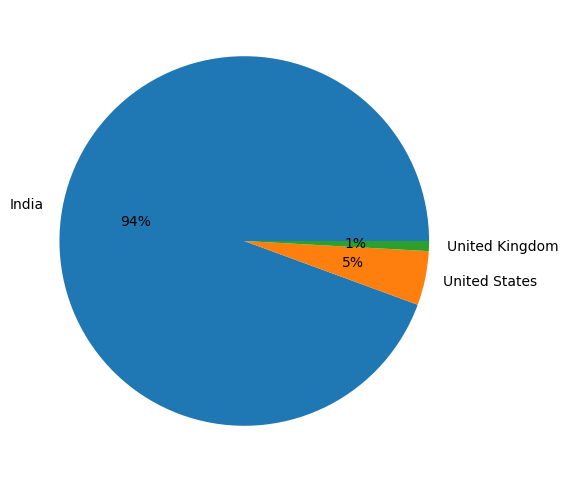

In [51]:
plt.pie(x=values[:3],labels=name[:3],data=final,autopct="%1.0f%%")
plt.show()

Bar plot to virtualize the ratings and and rating text

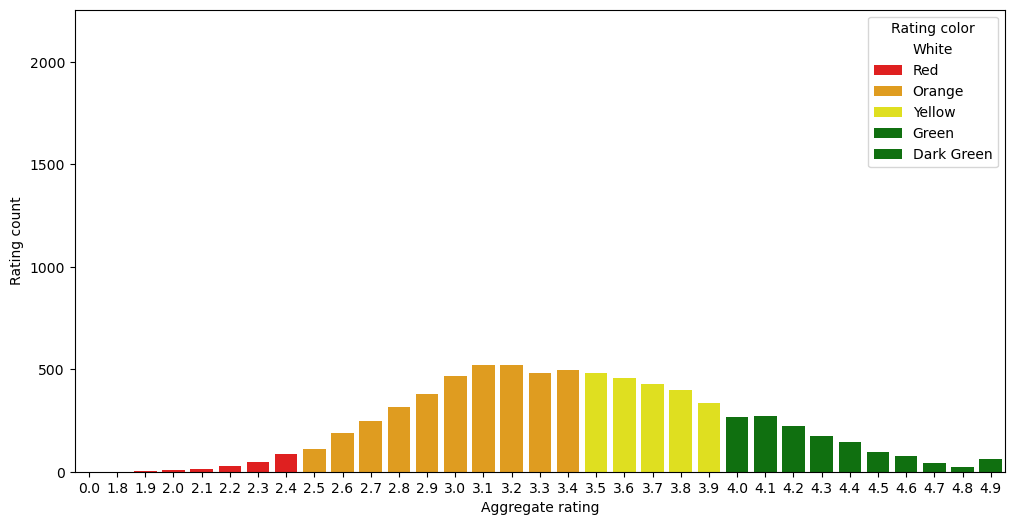

In [66]:
sns.barplot(x="Aggregate rating",y="Rating count",data=rating_info,hue="Rating color",palette=["White","Red","Orange","Yellow","Green","Green"])
plt.show() # -- 

we can see an gaussian curve (normal curve)\
max is 2.5 - 3.4 is good

Finding the names of countries give the ratings 0

In [78]:
final.columns
df=final[["Country","Aggregate rating"]]
df1=df[df["Aggregate rating"] == 0]
df1["Country"].value_counts().reset_index()

,Country,count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


India has max 0 ratings (not rated) 

Which currency is used by which country

In [106]:
df3=final[["Country","Currency"]].groupby(["Country","Currency"]).size().reset_index()
df3[["Country","Currency"]]

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


WHich country has online delivery

In [124]:
final[final["Has Online delivery"]=="Yes"].Country.value_counts().reset_index()

,Country,count
0,India,2423
1,UAE,28


Online deliveries are in only India and UAE

Now check for the cities in india uses most # top 5 \
Find tamilnadu

In [146]:
final.head()
final[final["City"].str.contains(r"Tamil",na=False)]
# no records
final[final["City"].str.contains(r"New",na=False)].City.value_counts()



City
New Delhi    5473
Name: count, dtype: int64

## Top 5 cities distribution

In [149]:
city_name=final.City.value_counts().index
city_value=final.City.value_counts().values

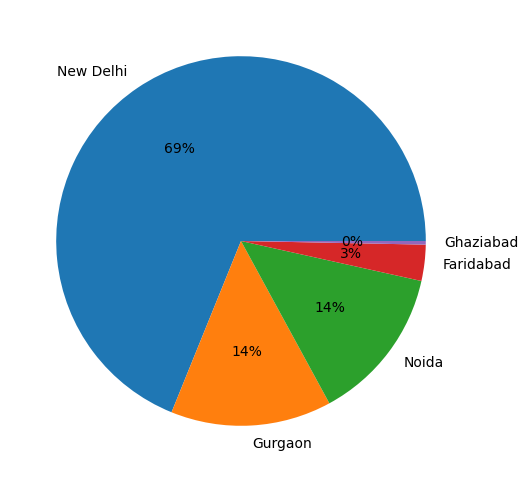

In [158]:
plt.pie(x=city_value[:5],labels=city_name[:5],data=final,autopct="%1.0f%%")
plt.show()